In [66]:
# Make code toggle-able for easier review.
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<i>The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a></i>.''')


# Analysis of Amazon.com's Unlocked Mobile Phone Market
## Diving into the world of Amazon ratings, reviews, and prices through the lens of the Unlocked Mobile Phone category
### Sam Fradkin
<br>

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [68]:
# Import the data
data = pd.read_csv('Amazon_Unlocked_Mobile.csv')

In [69]:
# Rename the columns removing all blank space characters
data.columns = ['ProductName', 'BrandName', 'Price', 'Rating', 'Reviews', 'ReviewVotes']

## 1. Background Analysis: What relationships exist between ratings, reviews, and price? 

### 1A. Data Utilized

More than 400,000 Amazon.com reviews from the Unlocked Mobile Phone category were extracted by PromptCloud, a custom web-scraping service. The data was collected in December 2016 for the purposes of finding possible relational insights with respect to reviews, ratings, and price. This dataset was then made available on Kaggle.

### 1B. Customer Demographic

To provide some context as to Amazon's Unlocked Mobile Phone customer base, let us understand who would be purchasing unlocked mobile phones. As Operations Manager and Logistics Director for a cellphone distribution company from 2010 through 2012, I gained some valuable insights on the makeup of this industry's customers.<br> <br>
In the United States, many individuals tie the purchase or upgrade of their mobile phones to their service provider. For example, Jack is looking for a cell phone plan for his son. Jack goes to his service provider, adds a line to his current plan, and purchases (or finances) a mobile phone from the service provider. Additionally, if the newer model of Jack's current mobile phone were to be released by the manufacturer, Jack waits until he is eligible for an upgrade through his service provider. This is very common in the United States but is not always the case.<br><br>
Customers of unlocked mobile phones often follow an alternative process. First, a large segment of the unlocked mobile phone industry is made up of international customers. These customers often do not have access to either the models or prices that are available in places such as the United States. Moreover, many countries' service providers do not have the strong bond with mobile phone manufacturers as is found in the United States. Second, another segment of the unlocked mobile phone customer base is comprised of those looking to replace damaged handsets that are not covered under warantee by the manufacturer or service provider. These individuals are looking for a cheaper alternative than purchasing a new mobile phone for the full retail price. These customers may often purchase from other Amazon.com categories, but it is possible that they might not represent the general Amazon.com population.<br><br>
Another factor that possibly affects the ratings and reviews in Amazon's unlocked mobile phone category is seller honesty. This most frequently appears in the market for used products, and unlocked mobile phones is no exception. Oftentimes sellers will list used product as "New" or they bump up the quality category a few levels from "Used - Acceptable" to "Certified Referbished." This issue can cause the unlocked mobile phone category to have skewed ratings and reviews from the rest of Amazon's marketplace. Seller honesty is an issue an exists in other categories as well, but I have not witnessed anything as prevalent as in the unlocked mobile phone market.

### 1C. Summary and Findings

Let's take a look at the first few rows of the dataset.

In [70]:
# Take a preview of the dataset
data.head()

,ProductName,BrandName,Price,Rating,Reviews,ReviewVotes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,200,5,I feel so LUCKY to have found this used (phone...,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,200,4,"nice phone, nice up grade from my pantach revu...",0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,200,5,Very pleased,0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,200,4,It works good but it goes slow sometimes but i...,0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,200,4,Great phone to replace my lost phone. The only...,0


In [71]:
# Count all unique instances in the BrandName and ProductName categories.
brands = len(list(set(data['BrandName'])))
products = len(list(set(data['ProductName'])))

In [72]:
# Create a pivot table of all grouped by BrandName running statistical functions on each, 
# sorting them by rating count and limiting the list to the top five brands.
# The data included a BrandName called "All" which included all products that were not
# given a specific value in the BrandName column.
pivot = pd.pivot_table(data,
            values = ['Rating'],
            index =  ['BrandName'],
            columns= [],
            aggfunc=[np.sum, np.mean, np.count_nonzero, np.std], 
            margins=True, fill_value=0).sort_values(by=('count_nonzero', 'Rating'), ascending=False).fillna('')
top_5_brands = pivot.reindex().head(6)[1:]
tfbStarMeans = top_5_brands[['mean','count_nonzero']].sort_values(by=('count_nonzero', 'Rating'), ascending=False)
tfbStarCount = top_5_brands['count_nonzero'].sort_values('Rating', ascending=False)
tfbStarMean = tfbStarMeans['mean']
tfStarMeantf = tfbStarMean['Rating'].mean()

In [73]:
# Create a list of the top five most positively rated brands
top_5_brands_list = top_5_brands.index.tolist()

# Create a variable of the sum total of all ratings for the top five brands
tf_rating_sum = float(top_5_brands['sum'].sum())

# Create a variable of the sum total of all ratings for the top five brands
tf_rating_Count = float(tfbStarCount['Rating'].sum())

# Create a sum variable of all ratings in the dataset
total_rating = data['Rating'].sum()

# Create a count variable of all ratings in the dataset
total_ratingCount = data['Rating'].count()

# Create a variable of the top five brands' ratio it makes up of all ratings in the set
tf_rating_ratio = ((tf_rating_sum / total_rating) * 100).round(decimals=2)

# Create a variable of the top five brands' count ratio it makes up of all ratings in the set
tf_ratingCount_ratio = ((tf_rating_Count / total_ratingCount) * 100).round(decimals=2)

In [74]:
# Create a table of rating sums for the top 5 brands and another row of all others
brands_5_andother = top_5_brands['sum'].copy()
brands_5_andother.loc['Other']=[total_rating - tf_rating_sum]
brands_5_andother['Ratio'] = (brands_5_andother.Rating / total_rating) * 100
pd.options.display.float_format = '{:,.0f}'.format

The dataset contains 4410 unique products across 385 brands. The five most rated brands, Samsung, BLU, Apple, LG, and BlackBerry, make up 54.72 percent of all ratings in the sample, with a mean overall star rating of 3.85 stars. (*Figure 1*)

Text(0.5,0,'Brand')

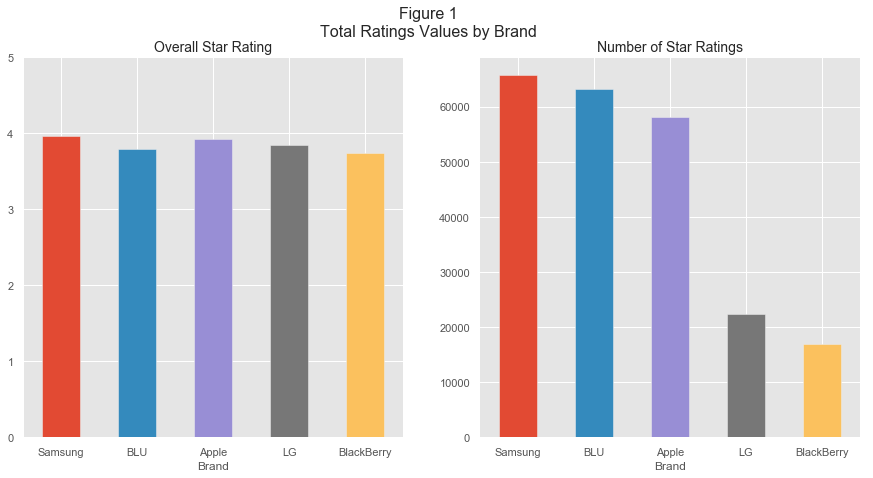

In [75]:
# Size of the plot
plt.rcParams["figure.figsize"] = "15, 7"
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.suptitle('Figure 1\n' + 'Total Ratings Values by Brand', fontsize=16)

# Create a bar plot for Ratings Sums 
plt.style.use('ggplot')
tfbStarMean['Rating'].plot(ax=axes[0], kind = 'bar', ylim=(0,5), rot=0)
axes[0].set_title('Overall Star Rating', fontsize=14)
axes[0].set_xlabel('Brand')

tfbStarCount['Rating'].plot(ax=axes[1], kind = 'bar', rot=0)
axes[1].set_title('Number of Star Ratings', fontsize=14)
axes[1].set_xlabel('Brand')

The dataset shows an mean star rating of 3.82 out of 5 stars, with a standard deviation of 1.55 stars. (*Figure 2*) However, we can only see a small correlation between product price and star rating. (*Figure 3*)

In [76]:
# Create a pivot table of all grouped by ProductName 
# The data included a BrandName called "All" which included all products that were not
# given a specific value in the BrandName column.
pivot2 = pd.pivot_table(data,
            values = ['Rating','Price'],
            index =  ['ProductName'],
            columns= [],
            aggfunc=[np.mean, np.count_nonzero], 
            margins=True, fill_value=0)
product_ratings = pivot2.copy().reset_index()
product_ratings.columns = ['ProductName', 'MeanPrice', 'MeanRating', 'CountPrice', 'CountRating']
product_ratings = product_ratings[product_ratings.CountRating < 100000]

In [77]:
# Create a function to add a specific star rating value into a new column based on the Rating value
def rating(r):
  if 0.0 < r['MeanRating'] < 1.5:
    return 1
  elif 1.5 <= r['MeanRating'] < 2.5:
    return 2
  elif 2.5 <= r['MeanRating'] < 3.5:
    return 3
  elif 3.5 <= r['MeanRating'] < 4.5:
    return 4
  elif 4.5 <= r['MeanRating'] < 5:
    return 5
  else:
    return ''

# Run the function to add values to the new Stars column
product_ratings['Stars'] = product_ratings.apply(rating, axis=1)

In [78]:
# Create a table of Star Ratings and their Counts
stars = product_ratings.groupby('Stars').aggregate(np.count_nonzero)
star_counts = stars[0:5].copy()

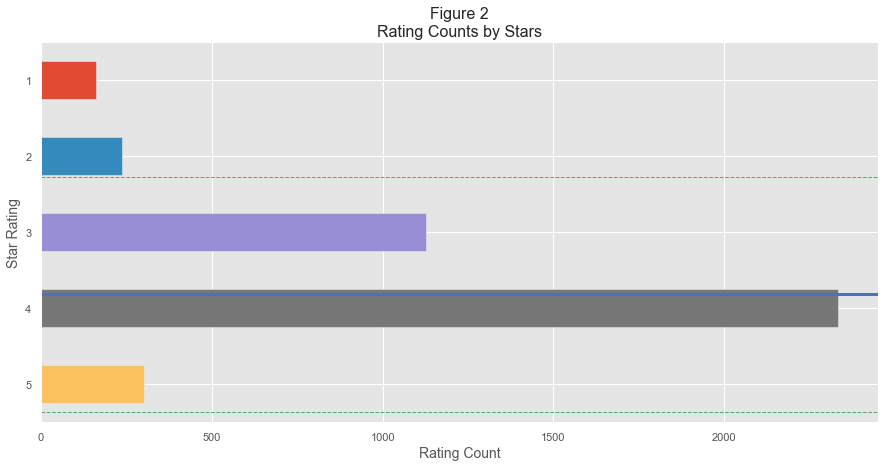

In [79]:
# Size of the plot
plt.rcParams["figure.figsize"] = "15, 7"
plt.style.use('ggplot')

# Create a bar plot for Star Rating Counts 
star_counts.CountRating.plot.barh()
plt.gca().invert_yaxis()

# Add horizontal lines for mean and standard deviation
plt.axhline((data['Rating'].mean() - 1), color='b', linestyle='solid', linewidth=3)
plt.axhline(data['Rating'].mean() + data['Rating'].std() - 1, color='g', linestyle='dashed', linewidth=1)
plt.axhline(data['Rating'].mean() - data['Rating'].std() - 1, color='g', linestyle='dashed', linewidth=1)

# Name the axes and the plot
plt.title('Figure 2\n' + 'Rating Counts by Stars', fontsize=16)
plt.ylabel('Star Rating', fontsize=14)
plt.xlabel('Rating Count', fontsize=14)

plt.show()

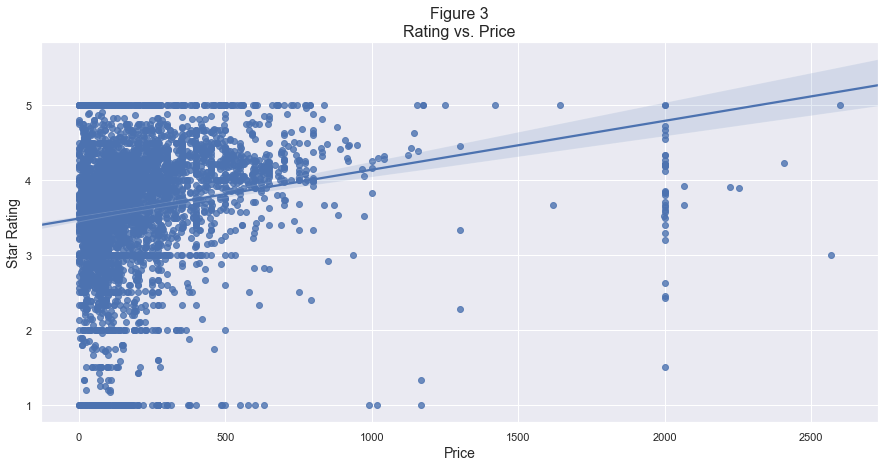

In [80]:
# Create a regression plot comparing Product Price and Rating
sns.set(color_codes=True)
ax = sns.regplot(x="MeanPrice", y="MeanRating", data=product_ratings)

# Name the axes and the plot
plt.title('Figure 3\n' + 'Rating vs. Price', fontsize=16)
plt.ylabel('Star Rating', fontsize=14)
plt.xlabel('Price', fontsize=14)

plt.show()

Looking at the data, we can learn that there is no relationship between price and the number of reviews. (*Figure 4*) Even more so, length of reviews have no relation to price as well. (*Figure 5*)

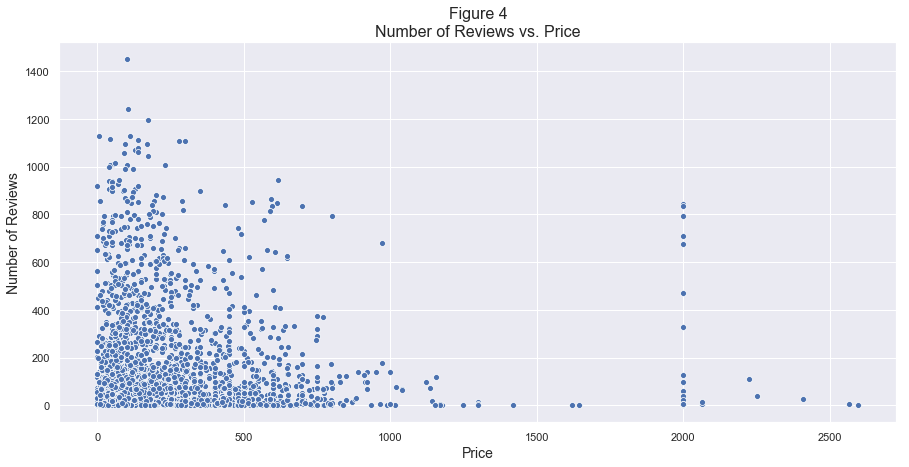

In [81]:
# Create a scatterplot comparing Product Price and Number of Reviews
sns.set(color_codes=True)
ax = sns.scatterplot(x="MeanPrice", y='CountRating', data=product_ratings)

# Name the axes and the plot
plt.title('Figure 4\n' + 'Number of Reviews vs. Price', fontsize=16)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xlabel('Price', fontsize=14)

plt.show()

In [82]:
# Create a dataframe to compare Price and Review Length
dataRL = data[['Price', 'Reviews']]

# Create a new column with the character length of each Review
dataRL['RLength'] = dataRL['Reviews'].apply(lambda x: len(str(x)))

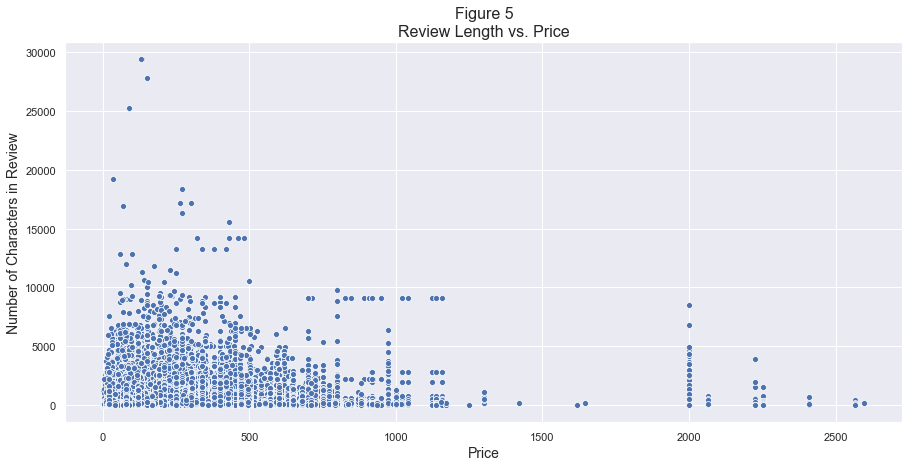

In [83]:
# Create a scatterplot comparing Product Price and Review Length
sns.set(color_codes=True)
ax = sns.scatterplot(x="Price", y='RLength', data=dataRL)

# Name the axes and the plot
plt.title('Figure 5\n' + 'Review Length vs. Price', fontsize=16)
plt.ylabel('Number of Characters in Review', fontsize=14)
plt.xlabel('Price', fontsize=14)

plt.show()

Now that we have seen that there is barely any relationship between price and ratings or reviews, what data should we look into so we can actually learn something valuable?

## 2. Research Proposal 

### 2A. The Problem

Amazon sellers often have a difficult time foreseeing how any specific product might sell. There are certain tricks that some sellers use to get a leg up over others and there are software plugins that offer different insights into the sellers’ world, but it is still somewhat of a shot in the dark.<br><br>
While reviews, ratings, and price are all nice and fun to know, the real statistic that matters is how many items were sold. With this information, we would be able to learn some seriously valuable statistics as to whether or not all the rest matters. For example, if we find products that are extremely expensive, have thousands of negative reviews, yet still sell a lot compared to other products, it would infer that all the rating and review data have little to no impact on sales.

### 2B. Hypothetical Solution

Amazon.com can offer a tool that indicates for sellers that provides insight into the correlation between ratings and sales. To do so, there are some serious data points that are missing from the dataset. First, data should be collected on the sum of units sold per product, as well as the number of refunded/returned purchases. This would provide insight into the weight value that ratings and reviews actually hold. Second, if possible, data should be collected on the count of impressions each review page generates. This would enable a conversion rate calculation to see how many customers viewed the rating and how it impacted their purchasing decision.<br><br>
This information will provide an answer to the following question - is a product’s overall star rating correlated with product sales. This, in turn, will help the purchasing decision process for Amazon.com sellers in their capital investment strategies.


### 2C. Hypothesis

A product’s overall star rating is correlated with product sales.

### 2D. Methods & Evaluation Plan

Conduct a test using Amazon.com’s Unlocked Mobile Phones category. Our key metric is the **Star Rating Impression Conversion Rate**. To calculate this metric, data will be collected on all sales made (or lack thereof) after viewing a  star rating. Another metric to track would be a price-based star rating impression conversion rate to see if different price brackets have different Star Rating Impression Conversion Rates. Another would be time duration between star rating impression and sale (or lack thereof).<br><br>
This test will run for two months. If after two months a significant correlation (p-value < 0.05) is found between product overall star rating and product sales, look into adding this as a feature in Amazon Seller Central. If after two months no significant correlation was found (p-value > 0.05) between product overall star rating and product sales, continue the test for another two months. If by then a significant correlation was still not found, adjust the company’s strategy regarding the entire ratings process as it seems to have a negligible effect (if any) on actual sales.